### The Ridge Regression and Multicollinearity

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = torch.tensor(range(5)).reshape(-1, 1) + 1

In [4]:
print(x)

tensor([[1],
        [2],
        [3],
        [4],
        [5]])


In [5]:
y = torch.cat([x, 5*x], 1)

In [6]:
print(y)

tensor([[ 1,  5],
        [ 2, 10],
        [ 3, 15],
        [ 4, 20],
        [ 5, 25]])


In [7]:
y0 = torch.cat([x, 5*x], 0)
print(y0)

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 5],
        [10],
        [15],
        [20],
        [25]])


In [8]:
print(y)

tensor([[ 1,  5],
        [ 2, 10],
        [ 3, 15],
        [ 4, 20],
        [ 5, 25]])


In [9]:
print(y.T.mm(y))

tensor([[  55,  275],
        [ 275, 1375]])


In [10]:
z = y.T.mm(y)
print(z)

tensor([[  55,  275],
        [ 275, 1375]])


In [11]:
print(z.inverse())

RuntimeError: ignored

In [12]:
print((z + 0.5 * torch.ones(2, 2)).inverse())

tensor([[ 3.1261, -0.6261],
        [-0.6261,  0.1261]])


### Polynomial Regression

In [13]:
# Defining the range of our distribution
X = torch.tensor([i for i in range(-30, 30)]).float()

# Function for creating a vector with value between [r1, r2]
def randvec(r1, r2, shape):
  return (r1 - r2) * torch.rand(shape) + r2

# Creating random points from a gaussian with random noise
y = randvec(-1e4, 1e4, X.shape) - (1/2) * X + 3 * X.pow(2) - (6/4) * X.pow(3)

In [14]:
print(X)

tensor([-30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
        -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
         -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
          6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
         18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.])


In [15]:
print(y)

tensor([ 49421.9883,  42022.1172,  40717.7930,  25476.2090,  34406.7070,
         17667.6523,  28027.8809,  17930.9238,  20712.1777,  18485.5410,
         12468.0645,  16471.6758,    914.4121,  -1327.7910,   9282.9492,
          -239.4971,   7667.3750,  12755.6699,   3796.2705,   4883.4478,
          5536.9658,  -6970.1621,    831.1367,   3607.5039,   6088.2598,
         -8843.9199,  -4880.9678,  -1587.5879,    672.1172,   7248.0957,
         -9349.4727,  -6088.2881,  -3975.6992,  -8294.9980,  -9249.7812,
          -374.1240,  -7969.1895,   6245.8525,   7445.3818,   3301.6338,
          3830.0366,    108.7715,   2569.3623,  -1076.5752,  -2359.6738,
        -10367.6396,   3070.9648,  -5084.3945,  -9930.2549,   -783.4033,
        -11183.6201, -12532.5410,  -5550.8105, -26563.6367, -16184.5869,
        -23425.3125, -30805.6660, -26237.3242, -38248.9766, -36051.5430])


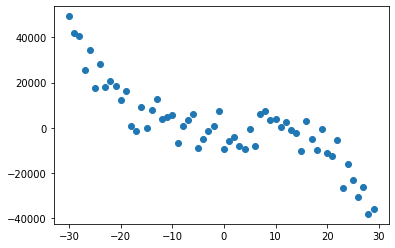

In [16]:
plt.scatter(X, y)

In [17]:
def poly_trans(X, degree=2):
  if len(X.shape) == 1:
    X = X.unsqueeze(1)
  
  ones_col = torch.ones((X.shape[0], 1), dtype=torch.float32)
  X_d = torch.cat([ones_col, X], axis=1)
  
  for i in range(1, degree):
    X_pow = X.pow(i + 1)
    X_d = torch.cat([X_d, X_pow], axis=1)
  
  return X_d

In [19]:
# (x^Tx)^(-1)x^Ty

def normal_equation(y_true, X):
  '''
  Computes the normal equation

  Args:
    y_true : A torch tensor for the labels
    X : A torch tensor for the data
  '''

  XTX_inv = (X.T.mm(X)).inverse()
  XTy = X.T.mm(y_true)
  beta = XTX_inv.mm(XTy)
  return beta

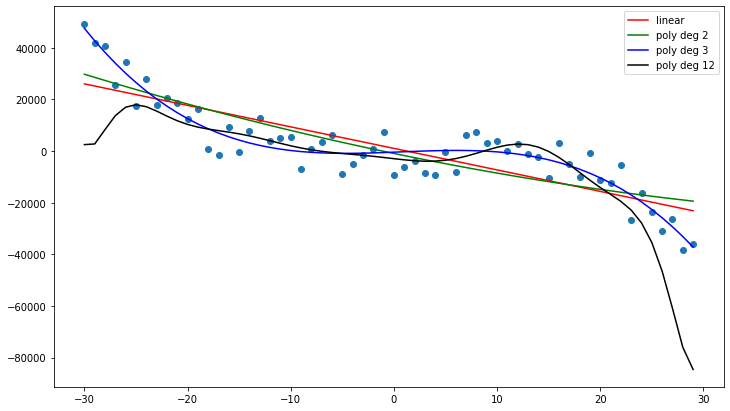

In [22]:
x1 = poly_trans(X, degree=1)
x2 = poly_trans(X, degree=2)
x3 = poly_trans(X, degree=3)
x12 = poly_trans(X, degree=12)

y_true = y.unsqueeze(1)

beta1 = normal_equation(y_true, x1)
beta2 = normal_equation(y_true, x2)
beta3 = normal_equation(y_true, x3)
beta12 = normal_equation(y_true, x12)

pred1 = x1.mm(beta1)
pred2 = x2.mm(beta2)
pred3 = x3.mm(beta3)
pred12 = x12.mm(beta12)

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(X, y)

plt.plot(X, pred1, c='red', label='linear')
plt.plot(X, pred2, c='green', label='poly deg 2')
plt.plot(X, pred3, c='blue', label='poly deg 3')
plt.plot(X, pred12, c='black', label='poly deg 12')

plt.legend(loc='best', ncol=1)